# Analyze SoHappy output files
This scripts analyse the txt/csv/fits file produced with SoHappy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

from astropy.table import Table, vstack
from IPython.display import display

import sys
sys.path.append("../../../../utilities_ths/")  
sys.path.append(".") 
from utilities_ths import MyLabel
from utilities_ths import stamp

plt.style.use('seaborn-talk') # Make the labels readable
#plt.style.use('seaborn-poster') # Make the labels readable - bug with normal x marker !!!

# Get the  data
%run prepare_data.py

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\astropy\config\configuration.py:557: ConfigurationMissingWarning: Configuration defaults will be used due to FileExistsError:17 on None
  warn(ConfigurationMissingWarning(msg))


Data where read from file :  ../../output/Prod10_nobug/Pop_1-1000GRB_0dof_100iter.csv
Data counts :  2000


\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\prepare_data.py:41: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_3s  = g_ana[i3s]
\\Dapdc5\stolar\My Documents\CTA\Analysis\GRB-Transients-RTA\Posityve_repo\SoHAPPy\analysis\prepare_data.py:42: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  g_5s  = g_ana[i5s]


# Max significance

 There are negative significance
(True,)
(False,)
do not limit to 3s


C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\series.py:856: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


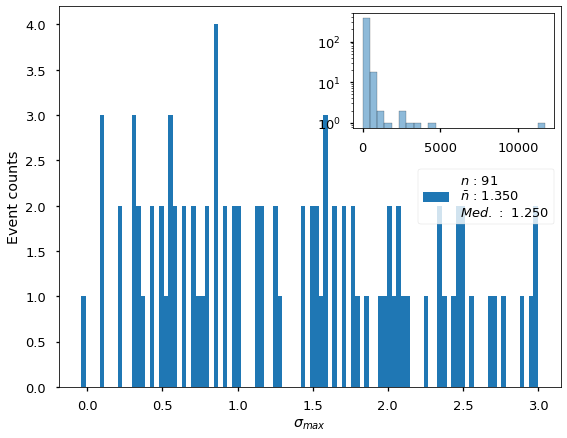

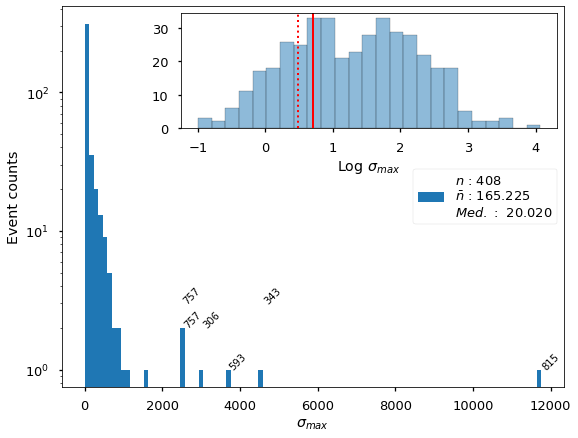

In [2]:

n_negative = len( g_ana.sigmax[g_ana.sigmax <= 0] )
print(" There are negative significance")

for shownegative in zip([True,False]):
    print(shownegative)
    nbin=100
    fig,ax = plt.subplots(nrows=1, ncols=1,figsize=(9,7))

    if (shownegative[0] ==False):
        print("do not limit to 3s")
        # Get name and sigmax of outliers
        maxsigmax = 2500
        outlier=zip(grb[grb.sigmax>maxsigmax].name,grb[grb.sigmax>maxsigmax].sigmax)

        #Plot sigmax and point outliers
        n,bins,_ = ax.hist((g_ana.sigmax),bins=nbin,label=MyLabel(g_ana.sigmax,stat="med"))
        ax.set_yscale("log")
        ax.set_xlabel("$\sigma_{max}$")
        ax.set_ylabel("Event counts")
        ax.legend(loc="center right")

        axx = inset_axes(ax,
                                width="75%", # width = 30% of parent_bbox
                                height=1.6, # height : 1 inch
                                loc="upper right")

        n,bins,_ = axx.hist(np.log10(g_ana.sigmax),
                           bins=25,
                           edgecolor="black",
                           facecolor="tab:blue",
                            alpha=0.5,
                           label=MyLabel(g_ana.sigmax))
        axx.axvline(np.log10(3),ls=":",color="red",lw="2",label="$3\sigma$")
        axx.axvline(np.log10(5),color="red",lw="2",label="$5\sigma$")
        # ax2.hist(np.log10(g_3s.sigmax),bins=bins,alpha=0.5,label=MyLabel(g_3s.sigmax,"$3\sigma$"))
        # ax2.hist(np.log10(g_5s.sigmax),bins=bins,alpha=0.5,label=MyLabel(g_5s.sigmax,"$3\sigma$"))

        axx.set_xlabel("Log $\sigma_{max}$")
        # ax2.set_ylabel("Event counts")
        # ax2.legend()

        i=1
        for g in outlier:
            #print(g[0][5:],g[1])
            y = 1+(i%3)
            ax.text(x=g[1],y=y,s=g[0][5:],rotation=45)
            i+=1

    else:
        n,bins,_ = ax.hist(g_ana.sigmax[g_ana.sigmax <= 3],
                           bins=nbin,label=MyLabel(g_ana.sigmax[g_ana.sigmax <= 3],stat="med"))
        ax.set_xlabel("$\sigma_{max}$")
        ax.set_ylabel("Event counts")
        ax.legend(loc="center right")

        axx = inset_axes(ax,
                                width="40%", # width = 30% of parent_bbox
                                height=1.6, # height : 1 inch
                                loc="upper right")

        n,bins,_ = axx.hist(g_ana.sigmax,
                           bins=25,
                           edgecolor="black",
                           facecolor="tab:blue",
                            alpha=0.5,
                           label=MyLabel(g_ana.sigmax))
        axx.set_yscale("log")

# The reason for high/low significance

In [3]:
def eiso_z(sample,var,site="none",
           color="blue",size=20,
           title="No title",label="No label",
           xmin=0,xmax=0,ymin=0,ymax=0,
          archive=False):
    nbin=100
    zlimit =7

    fig,ax1 = plt.subplots(nrows=1, ncols=1,figsize=(15,10))

    ax1.scatter(grb[site].z,np.log10(grb[site].eiso),
                facecolor="black",
                edgecolor="black",
                marker='.',
                alpha=0.8,
                s=10,
                label='All')

    scatplot = ax1.scatter(sample[site].z,
                  np.log10(sample[site].eiso),
                  alpha=0.5,
                  c=color,
                  s=size,
                  label=label)
# GRB 190114C	MAGIC	0.4245	3.00E+53
# GRB 180720B	HESS	0.654	6.00E+53
# GRB 080916C		4.3	8.80E+54
# GRB 090902B		1.822	2.20E+52
# GRB 130427A		0.34	9.60E+63

    if (archive==True):
        if (title == "North"):
            ax1.plot(0.4245,np.log10(3e53),marker="*",ms=15,lw=0,color="red",label="GRB 190114C")
        if (title == "South"):
            ax1.plot(0.654,np.log10(6e53),marker="*",ms=15,lw=0,color="red",label="GRB 180720B")
            
        ax1.plot(4.3  ,np.log10(8.8e54),marker="s",ms=10,lw=0,color="blue",alpha=0.8,label="GRB 080916C")
        ax1.plot(1.822,np.log10(2.2e52),marker="X",ms=10,lw=0,color="blue",alpha=0.8,label="GRB 090902B")
        ax1.plot(0.34 ,np.log10(9.6e53),marker="D",ms=10,lw=0,color="blue",alpha=0.8,label="GRB 130427A")

    ax1.set_xlim(xmin=xmin,xmax=zlimit)
    if (ymin != ymax): ax1.set_ylim(ymin=ymin,ymax=ymax)
    ax1.legend(loc="lower right")
    ax1.set_xlabel("Redshift ($z$)")
    ax1.set_ylabel("log10($E_{iso}$)")
    ax1.set_title(title)
    ax1.legend(loc="lower right")
#    plt.colorbar(scatplot)

#     legend1 = ax1.legend(*plt.scatter.legend_elements(),
#                     loc="lower left", title="Classes")
#     ax1.add_artist(legend1)

    # produce a legend with a cross section of sizes from the scatter
#     handles, labels = scatplot.legend_elements(prop="sizes", color="tab:blue",alpha=0.6)
#     legend2 = ax1.legend(handles, labels, loc="lower right", title=label)
    
    stamp(ax1,file)
    # Inset
    ax11 = inset_axes(ax1,
                       width="30%", # width = 30% of parent_bbox
                       height=1.5, # height : 1 inch
                       loc="upper right")
    ax11.scatter(grb[site].z,np.log10(grb[site].eiso),alpha=0.8,facecolor="black",
                 edgecolor="black",
                 marker='.',s=30,
                 )
    ax11.scatter(sample[site].z,
                      np.log10(sample[site].eiso),
                      alpha=0.5,
                      c = color,
                      s= size)
    ax11.set_xlim(xmin=zlimit)


    plt.show()
    return

C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:69: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


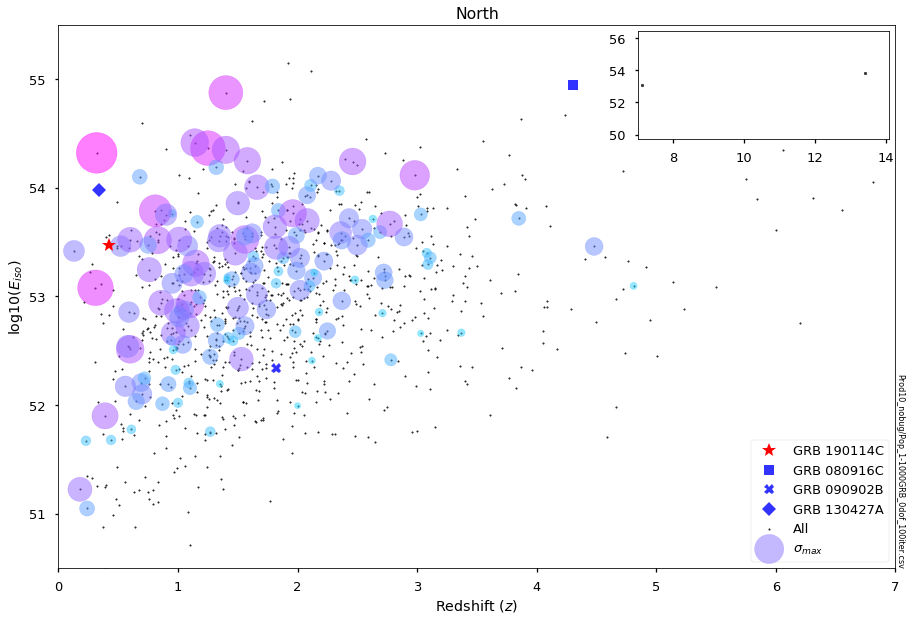

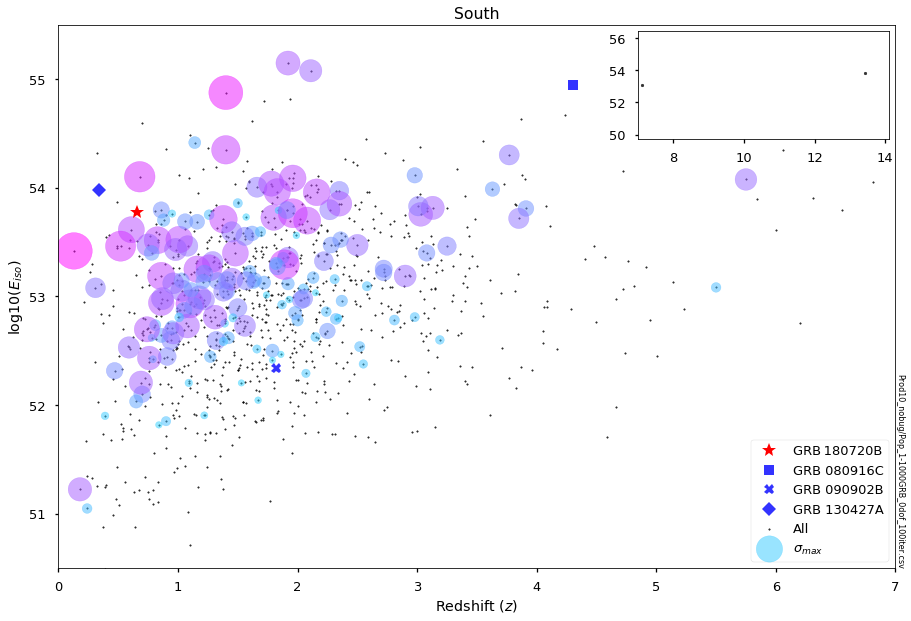

In [4]:
import matplotlib.cm as cm
for title,site in zip(["North","South"],[north,south]):
    sample = g_3s
    var    = sample[site].sigmax
    color  = -np.log10(var)
#    color = cm.rainbow(np.linspace(0, 1, n))
#    color = cm.viridis(np.linspace(0, 1, n))
    color = cm.cool(np.log10(var)/np.max(np.log10(var)))
    size   = 100*np.log10(var)**2
    eiso_z(sample,var,site=site,color=color,size=size,title=title,label="$\sigma_{max}$",ymin=50.5,ymax=55.5,archive=True)

In [13]:
grb.columns


Index(['name', 'eiso', 'z', 'site', 'ra', 'dec', 'ttrig', 't1', 't2', 'alt1',
       'alt2', 'az1', 'az2', 'nt', 'ndof', 'sigmax', 'nex_max', 'nb_max',
       't_max', 'altmax', 'azmax', 'nex_3s', 'nb_3s', 't3s', 'alt3s', 'az3s',
       'd3s', 'nex_5s', 'nb_5s', 't5s', 'alt5s', 'az5s', 'd5s', 'mct',
       'abort'],
      dtype='object')

In [20]:
print(g_3s[south][g_3s.z>5.5].name.values)
print(g_3s[south][g_3s.z>5.5].eiso.values)

['Event913']
[1.19e+54]


C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
C:\Users\stolar\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [5]:
def beasts(mask):
    print(g_ana[mask].name.values[0])
    print("-------------------")
    print("z    = {:>6.2f}".format(g_ana[mask].z.values[0]))
    print("Eiso = {:>6.2e} {:>3s}".format(g_ana[mask].eiso.values[0],"erg"))
    print("t5s  = {:>6.2f} {:>3s}".format(g_ana[mask].t5s.values[0],"s"))
    print("tmax = {:>6.2f} {:>3s}".format(g_ana[mask].t_max.values[0],"s"))
    print("smax = {:>6.2f}".format(g_ana[mask].sigmax.values[0],"erg"))

In [ ]:
beasts(g_ana.z>12)

In [21]:
beasts(g_ana.name=="Event815")

Event815
-------------------
z    =   0.32
Eiso = 2.09e+54 erg
t5s  = 360.62   s
tmax = 17300.00   s
smax = 11756.88


In [22]:
beasts(g_ana.name=="Event913")

Event913
-------------------
z    =   5.75
Eiso = 1.19e+54 erg
t5s  = 818.24   s
tmax = 12300.00   s
smax = 148.18


In [ ]:
plt.hist(g_3s.t3s/np.max(g_3s.t3s))

In [ ]:
for title,site in zip(["North","South"],[north,south]):
    sample = g_3s
    var    = sample[site].t3s
    color  = cm.cool(var/np.max(var))
    size   = 50 + 500*color**2
    eiso_z(sample,var,site=site,color=color,size=size,title=title,label="$t_{3\sigma}$",ymin=50.5,ymax=55.5)

In [ ]:
for title,site in zip(["North","South"],[north,south]):
    sample = g_5s
    var    = sample[site].t5s
    color  = 10-np.log10(var)
    size   = 50*np.log10(var)**2
    eiso_z(sample,var,site=site,color=color,size=size,title=title,label="$t_{5\sigma}$")


In [ ]:
for title,site in zip(["North","South"],[north,south]):
    sample = g_5s
    var    = sample[site].t_max-sample[site].t5s
    color  = 10-np.log10(var)
    size   = 50*np.log10(var)**2
    eiso_z(sample,var,site=site,color=color,size=size,title=title,label="$t_{5\sigma}$")


In [ ]:
nbin=50
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
n,bins,_ = ax.hist(np.log10(g_ana.sigmax),
                   bins=nbin,
                   edgecolor="black",
                   facecolor="none",
                   label=MyLabel(g_ana.sigmax))
ax.hist(np.log10(g_3s.sigmax),bins=bins,alpha=0.5,label=MyLabel(g_3s.sigmax,"$3\sigma$"))
ax.hist(np.log10(g_5s.sigmax),bins=bins,alpha=0.5,label=MyLabel(g_5s.sigmax,"$3\sigma$"))
ax.axvline(np.log10(3),ls=":",color="red",label="$3\sigma$")
ax.axvline(np.log10(5),color="red",label="$5\sigma$")
ax.semilogy()
ax.set_xlabel("Log of significance")
ax.legend()
plt.show()
plt.scatter(g_ana.sigmax,g_ana.eiso)
print(grb.name[grb.sigmax>1000])

In [ ]:
################## Merge dataframes #######################################
# See: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# for merge options
# When event are in common, only events having both TC and WT information   
# kept, allowing for correlation plot to be obtained
# If not, only individual dsitribution can be plotted
# "inner" is default in Panda
#
# Merge method	SQL Join Name	  Description
# --------------------------------------------------------------
# left	        LEFT OUTER JOIN	  Use keys from left frame only
# right	        RIGHT OUTER JOIN  Use keys from right frame only
# outer	        FULL OUTER JOIN	  Use union of keys from both frames
# inner	        INNER JOIN	      Use intersection of keys from both frames

In [ ]:
#     if (common):
#         tc_wt = pd.merge(tc, wt,  on="Id", how="inner", suffixes=('_tc', '_wt'))
#         df = pd.merge(tc_wt, ref, on="Id", how="inner" )
#     else:    
#         tc_wt = pd.merge(tc, wt,  on="Id", how="outer", suffixes=('_tc', '_wt'))  #.dropna(how='any')
#         df = pd.merge(tc_wt, ref, on="Id", how="outer")
# tc_wt = pd.merge(tc, wt, on="Id", suffixes=('_tc', '_wt'))  #.dropna(how='any')
# df = pd.merge(tc_wt, ref, on="Id")
grb2 = grb.merge(grb[n],grb[s],on="GRB",suffixes=('_n','_s'))
